In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind, f_oneway, ttest_1samp, norm
from sklearn.linear_model import LinearRegression

# Create a sample dataset
data = {
    'Student ID': range(1, 21),
    'Hours Studied': np.random.normal(6, 1.5, 20),
    'Exam Score': np.random.normal(83, 10, 20),
    'Group': np.random.choice(['A', 'B', 'C'], 20)
}
df = pd.DataFrame(data)

In [8]:
df

,Student ID,Hours Studied,Exam Score,Group
0,1,6.538155,102.254927,C
1,2,4.903718,88.373155,B
2,3,4.581474,89.938233,C
3,4,7.350999,73.163484,B
4,5,6.141865,94.906485,A
5,6,6.679193,74.856828,B
6,7,4.652555,75.947470,C
7,8,8.424851,86.541676,A
8,9,5.954093,84.424372,C
9,10,6.369686,78.789835,A


In [9]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
       Student ID  Hours Studied  Exam Score
count    20.00000      20.000000   20.000000
mean     10.50000       6.178919   85.314062
std       5.91608       1.410457    9.179671
min       1.00000       3.089766   73.163484
25%       5.75000       5.164641   77.709793
50%      10.50000       6.255775   85.477175
75%      15.25000       7.299208   88.829215
max      20.00000       8.424851  106.569418


In [10]:
# Correlation Analysis
corr_coef, p_value = pearsonr(df['Hours Studied'], df['Exam Score'])
print("\nCorrelation Analysis:")
print(f"Pearson Correlation Coefficient (r): {corr_coef:.2f}")
print(f"P-value: {p_value:.2f}")


Correlation Analysis:
Pearson Correlation Coefficient (r): -0.20
P-value: 0.40


In [11]:
# Linear Regression
X = df[['Hours Studied']]
y = df['Exam Score']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print("\nLinear Regression:")
print(f"Equation: Exam Score = {model.intercept_:.2f} + {model.coef_[0]:.2f}(Hours Studied)")
print(f"R-squared: {model.score(X, y):.2f}")


Linear Regression:
Equation: Exam Score = 93.31 + -1.29(Hours Studied)
R-squared: 0.04


In [12]:
# Inferential Statistical Analysis
print("\nInferential Statistical Analysis:")

# Hypothesis Testing
print("\nHypothesis Testing:")

# Test 1: Is the average Exam Score greater than 80?
null_hypothesis = 80
t_stat, p_value = ttest_1samp(df['Exam Score'], null_hypothesis)
print(f"Test 1: Average Exam Score > {null_hypothesis}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2f}")
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Test 2: Is the average Exam Score different between Group A and Group B?
group_a = df[df['Group'] == 'A']['Exam Score']
group_b = df[df['Group'] == 'B']['Exam Score']
t_stat, p_value = ttest_ind(group_a, group_b)
print("\nTest 2: Average Exam Score (Group A) != Average Exam Score (Group B)")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2f}")
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# One-Way ANOVA
f_stat, p_value = f_oneway(df[df['Group'] == 'A']['Exam Score'], df[df['Group'] == 'B']['Exam Score'], df[df['Group'] == 'C']['Exam Score'])
print("\nOne-Way ANOVA:")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.2f}")
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")




Inferential Statistical Analysis:

Hypothesis Testing:
Test 1: Average Exam Score > 80
T-statistic: 2.59
P-value: 0.02
Reject the null hypothesis

Test 2: Average Exam Score (Group A) != Average Exam Score (Group B)
T-statistic: 1.93
P-value: 0.08
Fail to reject the null hypothesis

One-Way ANOVA:
F-statistic: 1.77
P-value: 0.20
Fail to reject the null hypothesis


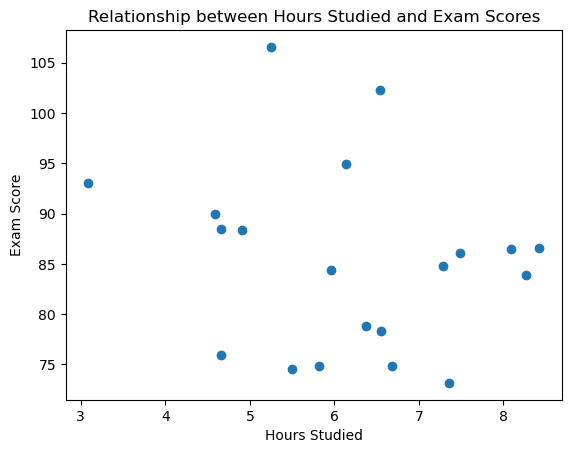

In [13]:
# Scatter Plot
plt.scatter(df['Hours Studied'], df['Exam Score'])
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Relationship between Hours Studied and Exam Scores')
plt.show()